# Exercise 4.1

You are given the MODIS LAI data files for the year 2012 in the directory `files/data` for the UK (MODIS tile .

Read the LAI datasets into a masked array, using QA bit 0 to mask the data (i.e. good quality data only) and generate a movie of LAI.

## Answer 4.1

You ought be getting familiar with this sort of problem, as it is very common.

Since we have the code in the main notes to read a single data dataset:

In [20]:
import gdal # Import GDAL library bindings
import numpy as np

# The file that we shall be using
# Needs to be on current directory
filename = 'files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf'

g = gdal.Open(filename)
# g should now be a GDAL dataset, but if the file isn't found
# g will be none. Let's test this:
if g is None:
    print "Problem opening file %s!" % filename
else:
    print "File %s opened fine" % filename
    
    
subdatasets = g.GetSubDatasets()
for fname, name in subdatasets:
    print name
    print "\t", fname

# Let's create a list with the selected layer names
selected_layers = [  "Lai_1km", "FparLai_QC" ]
# We will store the data in a dictionary
# Initialise an empty dictionary
data = {}
# for convenience, we will use string substitution to create a 
# template for GDAL filenames, which we'll substitute on the fly:
file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_MOD15A2:%s'
for i, layer in enumerate ( selected_layers ):
    this_file = file_template % ( filename, layer )
    print "Opening Layer %d: %s" % (i+1, this_file )
    g = gdal.Open ( this_file )
    
    if g is None:
        raise IOError
    data[layer] = g.ReadAsArray() 
    print "\t>>> Read %s!" % layer

# scale the LAI    
lai = data['Lai_1km'] * 0.1

# pull out the QC 
qc = data['FparLai_QC']
# find bit 0
qc = qc & 1

# generate the masked array
laim = np.ma.array ( lai, mask=qc )

File files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf opened fine
[1200x1200] Fpar_1km MOD_Grid_MOD15A2 (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf":MOD_Grid_MOD15A2:Fpar_1km
[1200x1200] Lai_1km MOD_Grid_MOD15A2 (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf":MOD_Grid_MOD15A2:Lai_1km
[1200x1200] FparLai_QC MOD_Grid_MOD15A2 (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf":MOD_Grid_MOD15A2:FparLai_QC
[1200x1200] FparExtra_QC MOD_Grid_MOD15A2 (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf":MOD_Grid_MOD15A2:FparExtra_QC
[1200x1200] FparStdDev_1km MOD_Grid_MOD15A2 (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf":MOD_Grid_MOD15A2:FparStdDev_1km
[1200x1200] LaiStdDev_1km MOD_Grid_MOD15A2 (8-bit unsigned integer)
	

We can use this as a function that reads a single dataset:

In [21]:
def read_modis_lai(filename):
    '''  Read MODIS LAI data from filename
         and return masked array
    '''

    g = gdal.Open(filename)
    # g should now be a GDAL dataset, but if the file isn't found
    # g will be none. Let's test this:
    if g is None:
        print "Problem opening file %s!" % filename
    else:
        print "File %s opened fine" % filename
        
        
    subdatasets = g.GetSubDatasets()
    #for fname, name in subdatasets:
        #print name
        #print "\t", fname
    
    # Let's create a list with the selected layer names
    selected_layers = [  "Lai_1km", "FparLai_QC" ]
    # We will store the data in a dictionary
    # Initialise an empty dictionary
    data = {}
    # for convenience, we will use string substitution to create a 
    # template for GDAL filenames, which we'll substitute on the fly:
    file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_MOD15A2:%s'
    for i, layer in enumerate ( selected_layers ):
        this_file = file_template % ( filename, layer )
        #print "Opening Layer %d: %s" % (i+1, this_file )
        g = gdal.Open ( this_file )
        
        if g is None:
            raise IOError
        data[layer] = g.ReadAsArray() 
        #print "\t>>> Read %s!" % layer
    
    # scale the LAI    
    lai = data['Lai_1km'] * 0.1
    
    # pull out the QC 
    qc = data['FparLai_QC']
    # find bit 0
    qc = qc & 1
    
    # generate the masked array
    laim = np.ma.array ( lai, mask=qc )
    
    return laim

and then loop:

In [22]:
import glob

year = 2012
tile = 'h17v03'
files = np.sort(glob.glob('files/data/MCD15A2.A%d*.%s.*.hdf'%(year,tile)))

lai = []
for f in files:
    lai.append(read_modis_lai(f))
    
# force it to be a masked array
lai = np.ma.array(lai)


File files/data/MCD15A2.A2012017.h17v03.005.2012026072526.hdf opened fine
File files/data/MCD15A2.A2012025.h17v03.005.2012052124839.hdf opened fine
File files/data/MCD15A2.A2012033.h17v03.005.2012042060649.hdf opened fine
File files/data/MCD15A2.A2012041.h17v03.005.2012050092057.hdf opened fine
File files/data/MCD15A2.A2012049.h17v03.005.2012068144447.hdf opened fine
File files/data/MCD15A2.A2012057.h17v03.005.2012068140544.hdf opened fine
File files/data/MCD15A2.A2012065.h17v03.005.2012075021749.hdf opened fine
File files/data/MCD15A2.A2012073.h17v03.005.2012083010304.hdf opened fine
File files/data/MCD15A2.A2012081.h17v03.005.2012090131602.hdf opened fine
File files/data/MCD15A2.A2012089.h17v03.005.2012107201245.hdf opened fine
File files/data/MCD15A2.A2012097.h17v03.005.2012108125047.hdf opened fine
File files/data/MCD15A2.A2012105.h17v03.005.2012116125519.hdf opened fine
File files/data/MCD15A2.A2012113.h17v03.005.2012122072153.hdf opened fine
File files/data/MCD15A2.A2012121.h17v

In [23]:
# plot the data
import pylab as plt

# work out a consistent scaling
lai_max = np.max(lai)

for i,f in enumerate(files):
    fig = plt.figure(figsize=(7,7))
    plt.imshow(lai[i],interpolation='none',vmin=0.,vmax=lai_max*0.75)
    # remember filenames of the form
    # files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf'
    file_id = f.split('/')[-1].split('.')[-5][1:]
    print file_id
    # plot a jpg
    plt.title(file_id)
    plt.colorbar()
    plt.savefig('files/images/lai_uk_%s.jpg'%file_id)
    plt.close(fig)

2012001
2012009
2012017
2012025
2012033
2012041
2012049
2012057
2012065
2012073
2012081
2012089
2012097
2012105
2012113
2012121
2012129
2012137
2012145
2012153
2012161
2012169
2012177
2012185
2012193
2012201
2012209
2012217
2012225
2012233
2012241
2012249
2012257
2012265
2012273
2012281
2012289
2012297
2012305
2012313
2012321
2012329
2012337
2012345
2012353
2012361
2012001
2012009
2012017
2012025
2012033
2012041
2012049
2012057
2012065
2012073
2012081
2012089
2012097
2012105
2012113
2012121
2012129
2012137
2012145
2012153
2012161
2012169
2012177
2012185
2012193
2012201
2012209
2012217
2012225
2012233
2012241
2012249
2012257
2012265
2012273
2012281
2012289
2012297
2012305
2012313
2012321
2012329
2012337
2012345
2012353
2012361


In [24]:
# now make a movie ...

import os

cmd = 'convert -delay 100 -loop 0 files/images/lai_uk_*.jpg files/images/lai_uk2.gif'
os.system(cmd)

0

0

![](files/images/lai_uk02.gif)

# Exercise 4.2: A Different Dataset

We have now dowloaded a different dataset, the [MOD10A product](http://www.icess.ucsb.edu/modis/SnowUsrGuide/usrguide_1dtil.html), which is the 500 m MODIS daily snow cover product, over the UK.

This is a good opportunity to see if you can apply what was learned above about interpreting QC information and using `gdal` to examine a dataset.

If you examine the [data description page](http://nsidc.org/data/docs/daac/modis_v5/mod10a1_modis_terra_snow_daily_global_500m_grid.gd.html), you will see that the data are in HDF EOS format (the same as the LAI product). 



## E4.2.1 Download

In [25]:
%%bash
tile=h17v03
year=2012
type=MOST
month=02

file=robot_snow.${year}_${type}_${tile}_${month}.txt

grep $tile < files/data/robot_snow.$year.txt | grep $type | grep "${year}\.${month}" > files/data/$file

wc -l files/data/$file

# cd temporarily to the local directory
pushd files/data
# -nc : no clobber : dont download if its there already
# -nH --cut-dirs=3 : ignore the directories
wget -nc -i $file -nH --cut-dirs=3
# cd back again
popd
echo $file

29 files/data/robot_snow.2012_MOST_h17v03_02.txt
~/p/geogg122_local/geogg122/Chapter4_GDAL/files/data ~/p/geogg122_local/geogg122/Chapter4_GDAL
~/p/geogg122_local/geogg122/Chapter4_GDAL
robot_snow.2012_MOST_h17v03_02.txt


Exception in thread Thread-2:
Traceback (most recent call last):
  File "/opt/anaconda/lib/python2.7/threading.py", line 808, in __bootstrap_inner
    self.run()
  File "/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/heartbeat.py", line 55, in run
    zmq.device(zmq.FORWARDER, self.socket, self.socket)
  File "device.pyx", line 55, in zmq.core.device.device (zmq/core/device.c:854)
ZMQError: Interrupted system call

File `MOD10A1.A2012032.h17v03.005.2012046141710.hdf' already there; not retrieving.
File `MOD10A1.A2012033.h17v03.005.2012035071148.hdf' already there; not retrieving.
File `MOD10A1.A2012034.h17v03.005.2012036060335.hdf' already there; not retrieving.
File `MOD10A1.A2012035.h17v03.005.2012037061127.hdf' already there; not retrieving.
File `MOD10A1.A2012036.h17v03.005.2012038044224.hdf' already there; not retrieving.
File `MOD10A1.A2012037.h17v03.005.2012039055929.hdf' already there; not retrieving.
File `MOD10A1.A2012038.h17v03.005.2012040045622.hdf' already th

29 files/data/robot_snow.2012_MOST_h17v03_02.txt
~/p/geogg122_local/geogg122/Chapter4_GDAL/files/data ~/p/geogg122_local/geogg122/Chapter4_GDAL
~/p/geogg122_local/geogg122/Chapter4_GDAL
robot_snow.2012_MOST_h17v03_02.txt


File `MOD10A1.A2012032.h17v03.005.2012046141710.hdf' already there; not retrieving.
File `MOD10A1.A2012033.h17v03.005.2012035071148.hdf' already there; not retrieving.
File `MOD10A1.A2012034.h17v03.005.2012036060335.hdf' already there; not retrieving.
File `MOD10A1.A2012035.h17v03.005.2012037061127.hdf' already there; not retrieving.
File `MOD10A1.A2012036.h17v03.005.2012038044224.hdf' already there; not retrieving.
File `MOD10A1.A2012037.h17v03.005.2012039055929.hdf' already there; not retrieving.
File `MOD10A1.A2012038.h17v03.005.2012040045622.hdf' already there; not retrieving.
File `MOD10A1.A2012039.h17v03.005.2012041055153.hdf' already there; not retrieving.
File `MOD10A1.A2012040.h17v03.005.2012042055706.hdf' already there; not retrieving.
File `MOD10A1.A2012041.h17v03.005.2012045014038.hdf' already there; not retrieving.
File `MOD10A1.A2012042.h17v03.005.2012045024036.hdf' already there; not retrieving.
File `MOD10A1.A2012043.h17v03.005.2012045091534.hdf' already there; not retr

## E4.2.2 Explore

We explore the dataset in the same way as above:

In [26]:
# how to find out which datasets are in the file

import gdal # Import GDAL library bindings

# The file that we shall be using
# Needs to be on current directory
filename = 'files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf'

g = gdal.Open(filename)
# g should now be a GDAL dataset, but if the file isn't found
# g will be none. Let's test this:
if g is None:
    print "Problem opening file %s!" % filename
else:
    print "File %s opened fine" % filename
    
    
subdatasets = g.GetSubDatasets()
for fname, name in subdatasets:
    print name
    print "\t", fname


File files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf opened fine
[2400x2400] Snow_Cover_Daily_Tile MOD_Grid_Snow_500m (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Snow_Cover_Daily_Tile
[2400x2400] Snow_Spatial_QA MOD_Grid_Snow_500m (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Snow_Spatial_QA
[2400x2400] Snow_Albedo_Daily_Tile MOD_Grid_Snow_500m (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Snow_Albedo_Daily_Tile
[2400x2400] Fractional_Snow_Cover MOD_Grid_Snow_500m (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Fractional_Snow_Cover
File files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf opened fine
[2400x2400] Snow_Cover_Daily_Tile MOD_Grid_Snow_500m (8-bit unsigned integ

## E4.3.3 Read a dataset

This is very nearly the same as the LAI dataset reading.

We need obviously to select a different layer name.

We should also notice that the `file_template` will be slightly different (look at the list of subsets above).

In [27]:
# How to access specific datasets in gdal

# Let's create a list with the selected layer names
selected_layers = [  "Fractional_Snow_Cover" ]

# We will store the data in a dictionary
# Initialise an empty dictionary
data = {}

# for convenience, we will use string substitution to create a 
# template for GDAL filenames, which we'll substitute on the fly:
file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_Snow_500m:%s'
# This has two substitutions (the %s parts) which will refer to:
# - the filename
# - the data layer

for i, layer in enumerate ( selected_layers ):
    this_file = file_template % ( filename, layer )
    print "Opening Layer %d: %s" % (i+1, this_file )
    g = gdal.Open ( this_file )
    
    if g is None:
        raise IOError
    data[layer] = g.ReadAsArray() 
    print "\t>>> Read %s!" % layer


Opening Layer 1: HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Fractional_Snow_Cover
	>>> Read Fractional_Snow_Cover!
Opening Layer 1: HDF4_EOS:EOS_GRID:"files/data/MOD10A1.A2012060.h17v03.005.2012062064750.hdf":MOD_Grid_Snow_500m:Fractional_Snow_Cover
	>>> Read Fractional_Snow_Cover!


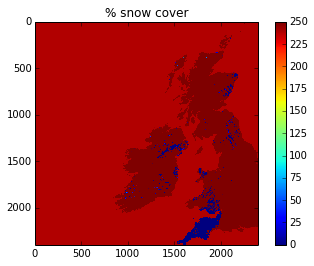

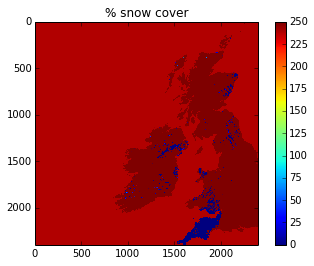

In [28]:
plt.imshow(data["Fractional_Snow_Cover"])
plt.colorbar()
plt.title('% snow cover')

## E4.3.4 Water mask

The data description page tells us that values of 237 239 will indicate whether the data are ocean or inland water bodies. These are what you should use to build the water mask.

In [29]:
snow = data["Fractional_Snow_Cover"]

water =  (snow == 239)

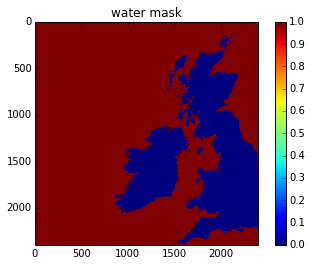

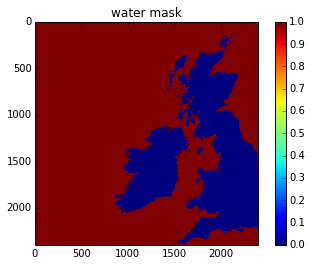

In [30]:
plt.imshow(water)
plt.colorbar()
plt.title('water mask')

## E4.3.5 Valid pixel mask

In [31]:
snow = data["Fractional_Snow_Cover"]

valid_mask = (snow > 100)

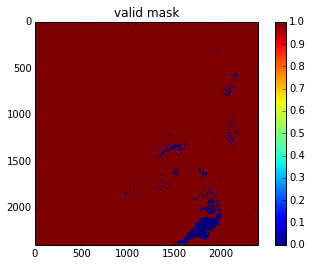

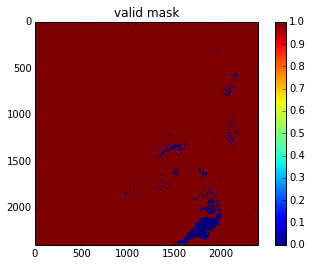

In [32]:
plt.imshow(valid_mask)
plt.colorbar()
plt.title('valid mask')


## E4.3.6 3D dataset

You should be used to this sort of thing by now.

First, lets sort the filenames:

In [33]:
# filenames from the file
url_file = 'files/data/robot_snow.2012_MOST_h17v03_02.txt'

# open the file for read
fp = open(url_file,'r')

# the strip is to get rid of the \n character
filenames = [f.split('/')[-1].strip() for f in fp.readlines()]

# close the file
fp.close

# lets see what we got
print filenames

['MOD10A1.A2012032.h17v03.005.2012046141710.hdf', 'MOD10A1.A2012033.h17v03.005.2012035071148.hdf', 'MOD10A1.A2012034.h17v03.005.2012036060335.hdf', 'MOD10A1.A2012035.h17v03.005.2012037061127.hdf', 'MOD10A1.A2012036.h17v03.005.2012038044224.hdf', 'MOD10A1.A2012037.h17v03.005.2012039055929.hdf', 'MOD10A1.A2012038.h17v03.005.2012040045622.hdf', 'MOD10A1.A2012039.h17v03.005.2012041055153.hdf', 'MOD10A1.A2012040.h17v03.005.2012042055706.hdf', 'MOD10A1.A2012041.h17v03.005.2012045014038.hdf', 'MOD10A1.A2012042.h17v03.005.2012045024036.hdf', 'MOD10A1.A2012043.h17v03.005.2012045091534.hdf', 'MOD10A1.A2012044.h17v03.005.2012046060303.hdf', 'MOD10A1.A2012045.h17v03.005.2012047061553.hdf', 'MOD10A1.A2012046.h17v03.005.2012048071318.hdf', 'MOD10A1.A2012047.h17v03.005.2012049053946.hdf', 'MOD10A1.A2012048.h17v03.005.2012050063219.hdf', 'MOD10A1.A2012049.h17v03.005.2012051070019.hdf', 'MOD10A1.A2012050.h17v03.005.2012052062212.hdf', 'MOD10A1.A2012051.h17v03.005.2012053064001.hdf', 'MOD10A1.A2012052.h

Using `glob` you might try:

In [34]:
# using glob
from glob import glob

filenames = glob('files/data/MOD10A1.A2012*.hdf')
print filenames

['files/data/MOD10A1.A2012301.h17v03.005.2012303060756.hdf', 'files/data/MOD10A1.A2012022.h17v03.005.2012024065639.hdf', 'files/data/MOD10A1.A2012035.h17v03.005.2012037061127.hdf', 'files/data/MOD10A1.A2012099.h17v03.005.2012101130724.hdf', 'files/data/MOD10A1.A2012045.h17v03.005.2012047061553.hdf', 'files/data/MOD10A1.A2012026.h17v03.005.2012028061520.hdf', 'files/data/MOD10A1.A2012052.h17v03.005.2012054062116.hdf', 'files/data/MOD10A1.A2012300.h17v03.005.2012302074825.hdf', 'files/data/MOD10A1.A2012302.h17v03.005.2012305001707.hdf', 'files/data/MOD10A1.A2012101.h17v03.005.2012103060602.hdf', 'files/data/MOD10A1.A2012027.h17v03.005.2012029055452.hdf', 'files/data/MOD10A1.A2012033.h17v03.005.2012035071148.hdf', 'files/data/MOD10A1.A2012006.h17v03.005.2012008070328.hdf', 'files/data/MOD10A1.A2012034.h17v03.005.2012036060335.hdf', 'files/data/MOD10A1.A2012019.h17v03.005.2012021060039.hdf', 'files/data/MOD10A1.A2012011.h17v03.005.2012013083450.hdf', 'files/data/MOD10A1.A2012049.h17v03.005

But that isn't refined enough (i.e. it won't only pull files for February if there are more).

So, we need to pull files from doy 32 to 60 inclusive ... which is a lot more tricky ...

In [35]:
# using glob
from glob import glob

filenames = glob('files/data/MOD10A1.A201203[2-9].*.hdf') +\
            glob('files/data/MOD10A1.A201204?.*.hdf') +\
            glob('files/data/MOD10A1.A201205?.*.hdf') +\
            glob('files/data/MOD10A1.A2012060.*.hdf')
print filenames

['files/data/MOD10A1.A2012035.h17v03.005.2012037061127.hdf', 'files/data/MOD10A1.A2012033.h17v03.005.2012035071148.hdf', 'files/data/MOD10A1.A2012034.h17v03.005.2012036060335.hdf', 'files/data/MOD10A1.A2012032.h17v03.005.2012046141710.hdf', 'files/data/MOD10A1.A2012036.h17v03.005.2012038044224.hdf', 'files/data/MOD10A1.A2012039.h17v03.005.2012041055153.hdf', 'files/data/MOD10A1.A2012038.h17v03.005.2012040045622.hdf', 'files/data/MOD10A1.A2012037.h17v03.005.2012039055929.hdf', 'files/data/MOD10A1.A2012045.h17v03.005.2012047061553.hdf', 'files/data/MOD10A1.A2012049.h17v03.005.2012051070019.hdf', 'files/data/MOD10A1.A2012047.h17v03.005.2012049053946.hdf', 'files/data/MOD10A1.A2012043.h17v03.005.2012045091534.hdf', 'files/data/MOD10A1.A2012044.h17v03.005.2012046060303.hdf', 'files/data/MOD10A1.A2012048.h17v03.005.2012050063219.hdf', 'files/data/MOD10A1.A2012040.h17v03.005.2012042055706.hdf', 'files/data/MOD10A1.A2012041.h17v03.005.2012045014038.hdf', 'files/data/MOD10A1.A2012046.h17v03.005

Practically, you might be better off reading an interpreting the url file as above, or alternatively, put all of the February files in a different directory and `glob` that ...

In [36]:
# in any case, we should sort the filenames
filenames = sort(filenames)

Next, let's define a function to read a single file into a numpy array (and simplify what we have above a bit):

In [37]:
import numpy.ma as ma

def read_snow(filename):
    
    layers = "Fractional_Snow_Cover"
    
    # for convenience, we will use string substitution to create a 
    # template for GDAL filenames, which we'll substitute on the fly:
    file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_Snow_500m:%s'
    # This has two substitutions (the %s parts) which will refer to:
    # - the filename
    # - the data layer
    
    this_file = file_template % ( filename, layer )
    g = gdal.Open ( this_file )
    
    if g is None:
        raise IOError
    snow = g.ReadAsArray() 

    # dont use this here, but just in case useful
    #water = (snow == 239)
    
    valid_mask = (snow > 100)
        
    return ma.array(snow,mask=valid_mask)

Now, test it:

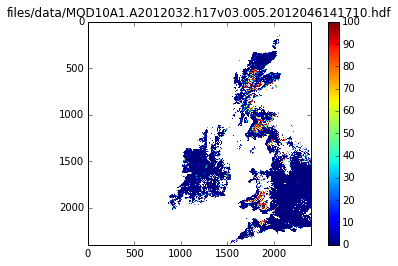

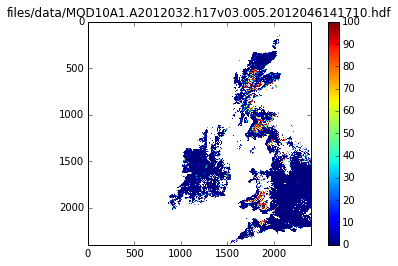

In [38]:
snow = read_snow(filenames[0])

plt.imshow(snow,vmax=100)
plt.colorbar()
plt.title(filenames[0])

Now its just a loop as in several previous examples:

In [ ]:
snow = []
for f in filenames:
    snow.append(read_snow(f))

snow = ma.array(snow)

In [ ]:
# or neater ...

snow = ma.array([read_snow(f) for f in filenames])

In [ ]:
print snow.shape

(29, 2400, 2400)


2012032
2012033
2012034
2012035
2012036
2012037
2012038
2012039
2012040
2012041
2012042
2012043
2012044
2012045
2012046
2012047
2012048
2012049
2012050
2012051
2012052
2012053
2012054
2012055
2012056
2012057
2012058
2012059
2012060


/opt/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


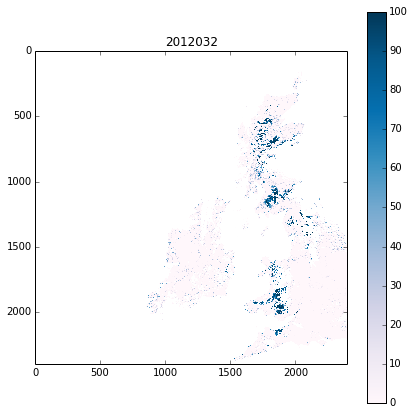

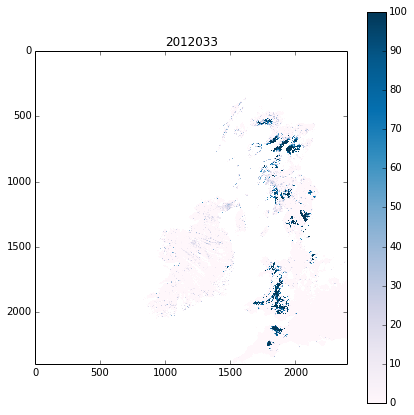

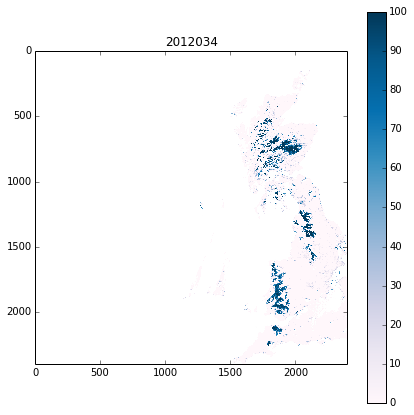

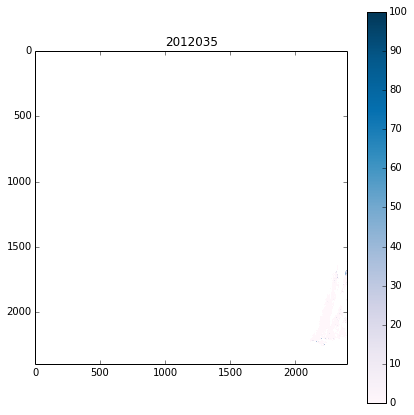

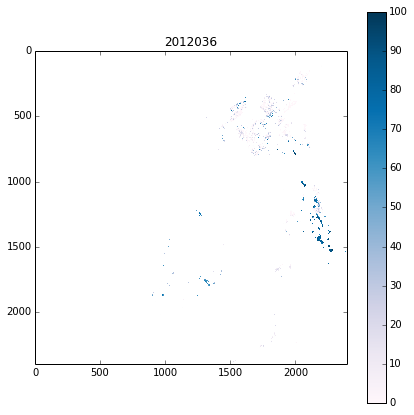

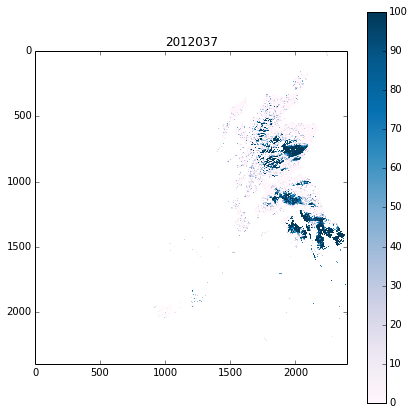

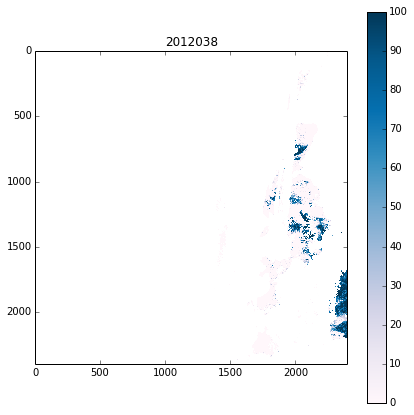

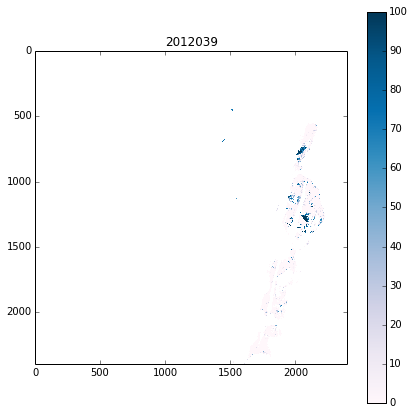

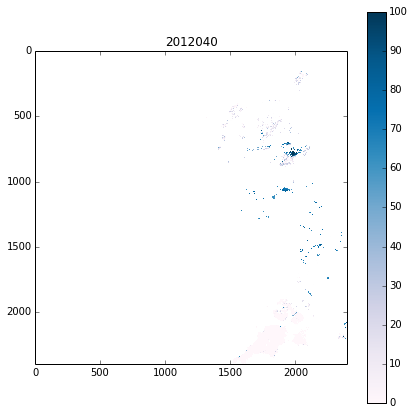

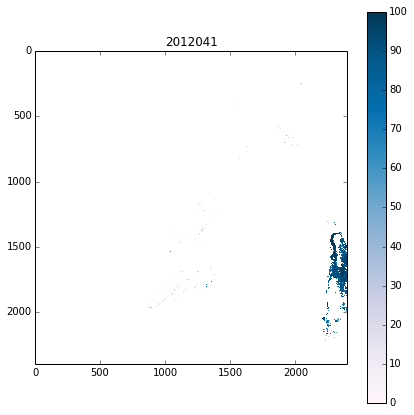

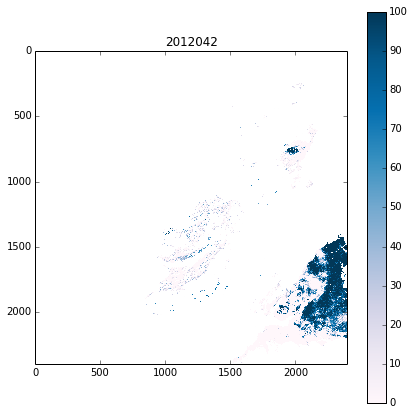

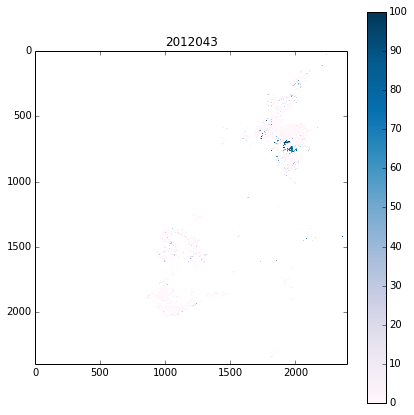

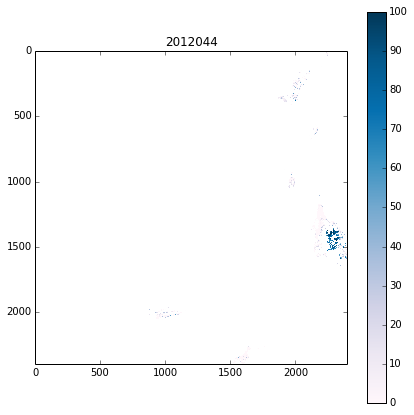

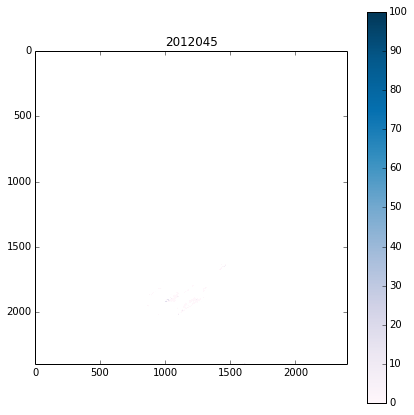

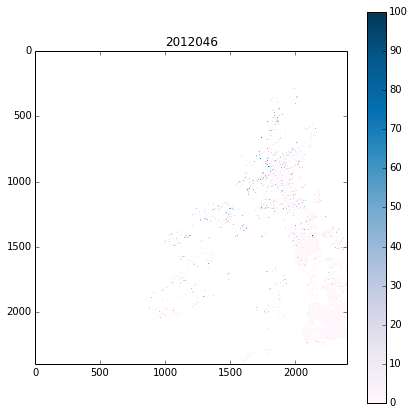

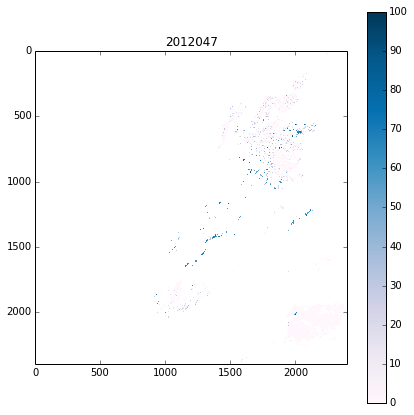

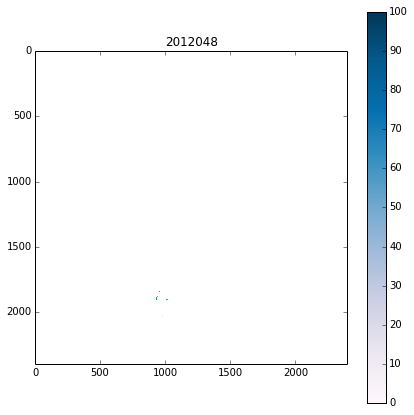

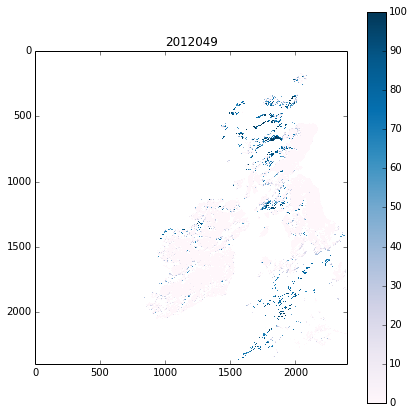

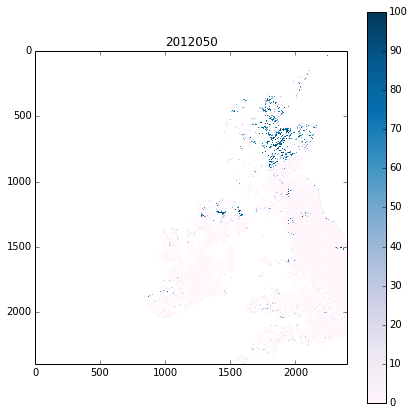

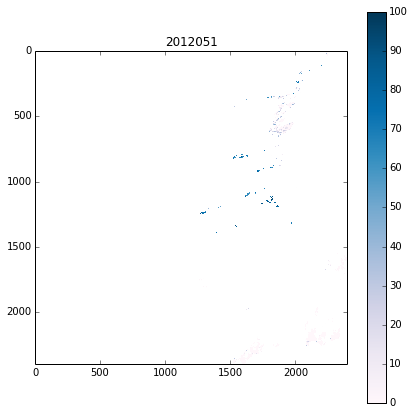

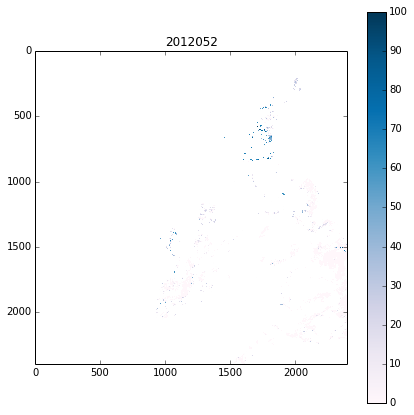

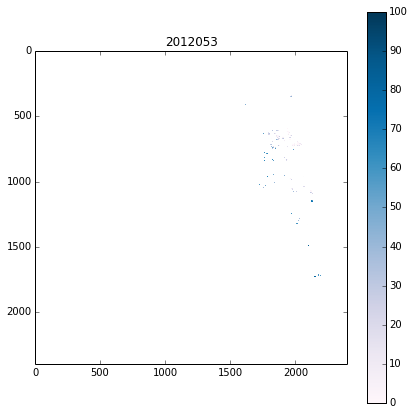

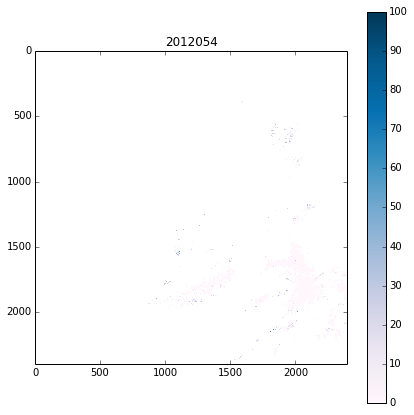

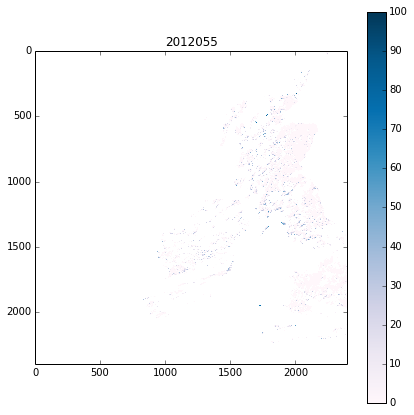

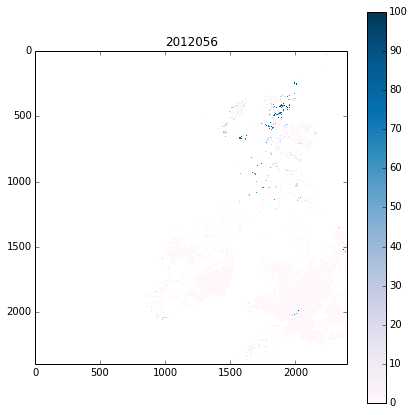

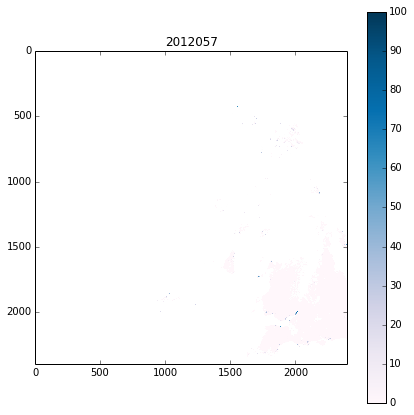

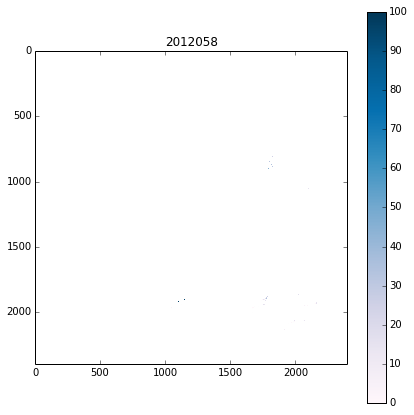

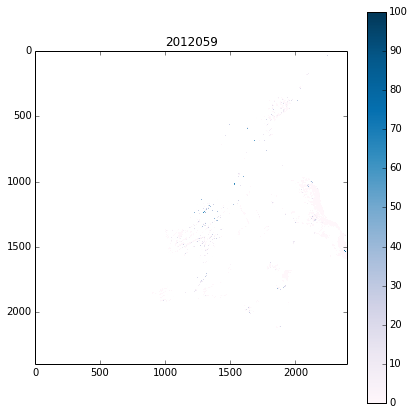

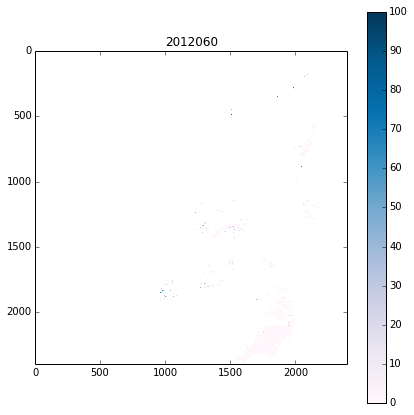

In [ ]:
# now plot and save images
# plot the data
import pylab as plt

cmap = plt.cm.PuBu

for i,f in enumerate(filenames):
    plt.figure(figsize=(7,7))
    plt.imshow(snow[i],cmap=cmap,interpolation='none',vmin=0.,vmax=100)
    # remember filenames of the form
    # files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf'
    file_id = f.split('/')[-1].split('.')[-5][1:]
    print file_id
    # plot a jpg
    plt.title(file_id)
    plt.colorbar()
    plt.savefig('files/images/snow_uk_%s.jpg'%file_id)

In [ ]:
# now make a movie ...

import os

cmd = 'convert -delay 100 -loop 0 files/images/snow_uk_*.jpg files/images/snow_uk2.gif'
os.system(cmd)

0

![](files/images/snow_uk2.gif)

## Exercise 4.3

Again, you should be used to this sort of thing by now.

We have the following code to base this on:

<matplotlib.colorbar.Colorbar instance at 0x47fc61b8>

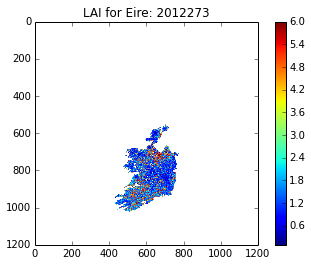

In [ ]:
import sys
sys.path.insert(0,'files/python')
from raster_mask import raster_mask, getLAI

# test this on an LAI file

# the data file name
filename = 'files/data/MCD15A2.A2012273.h17v03.005.2012297134400.hdf'

# a layer (doesn't matter so much which: use for geometry info)
layer = 'Lai_1km'
# the full dataset specification
file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_MOD15A2:%s'
file_spec = file_template%(filename,layer)

# make a raster mask
# from the layer IRELAND in world.shp
mask = raster_mask(file_spec,\
                   target_vector_file = "files/data/world.shp",\
                   attribute_filter = "NAME = 'IRELAND'")

# get the LAI data
data = getLAI(filename)

# reset the data mask
# 'mask' is True for Ireland
# so take the opposite 
data['Lai_1km'] = ma.array(data['Lai_1km'],mask=mask)
data['LaiStdDev_1km'] = ma.array(data['Lai_1km'],mask=mask)

plt.title('LAI for Eire: 2012273')
plt.imshow(data['Lai_1km'],vmax=6)
plt.colorbar()

Obviously, we will need to specify a set of filenames again.

These have a simple filename pattern, so `glob` would be appropriate (don't forget to `sort`:

In [ ]:
from glob import glob

filenames = sort(glob('files/data/MCD15A2.A2012???.h17v03.005.*.hdf'))

print filenames

['files/data/MCD15A2.A2012001.h17v03.005.2012017211237.hdf'
 'files/data/MCD15A2.A2012009.h17v03.005.2012019044037.hdf'
 'files/data/MCD15A2.A2012017.h17v03.005.2012026072526.hdf'
 'files/data/MCD15A2.A2012025.h17v03.005.2012052124839.hdf'
 'files/data/MCD15A2.A2012033.h17v03.005.2012042060649.hdf'
 'files/data/MCD15A2.A2012041.h17v03.005.2012050092057.hdf'
 'files/data/MCD15A2.A2012049.h17v03.005.2012068144447.hdf'
 'files/data/MCD15A2.A2012057.h17v03.005.2012068140544.hdf'
 'files/data/MCD15A2.A2012065.h17v03.005.2012075021749.hdf'
 'files/data/MCD15A2.A2012073.h17v03.005.2012083010304.hdf'
 'files/data/MCD15A2.A2012081.h17v03.005.2012090131602.hdf'
 'files/data/MCD15A2.A2012089.h17v03.005.2012107201245.hdf'
 'files/data/MCD15A2.A2012097.h17v03.005.2012108125047.hdf'
 'files/data/MCD15A2.A2012105.h17v03.005.2012116125519.hdf'
 'files/data/MCD15A2.A2012113.h17v03.005.2012122072153.hdf'
 'files/data/MCD15A2.A2012121.h17v03.005.2012137221611.hdf'
 'files/data/MCD15A2.A2012129.h17v03.005

Now we just build a loop around that:

In [ ]:
import sys
sys.path.insert(0,'files/python')
from raster_mask import raster_mask, getLAI
from glob import glob

# a layer (doesn't matter so much which: use for geometry info)
layer = 'Lai_1km'
# the full dataset specification

file_template = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_MOD15A2:%s'

# list of filenames
filenames = sort(glob('files/data/MCD15A2.A2012???.h17v03.005.*.hdf'))

# build a mask: use filenames[0] for geometry
print 'building mask ...'
mask = raster_mask(file_template%(filenames[0],layer),\
                       target_vector_file = "files/data/world.shp",\
                       attribute_filter = "NAME = 'IRELAND'")

lai = []
print 'looping over files...'
for filename in filenames:
    # get the LAI data
    print filename
    data = getLAI(filename)
    
    # reset the data mask
    lai.append(ma.array(data['Lai_1km'],mask=mask))
    
# convert to masked array   
lai = ma.array(lai)


building mask ...
looping over files...
files/data/MCD15A2.A2012001.h17v03.005.2012017211237.hdf
files/data/MCD15A2.A2012009.h17v03.005.2012019044037.hdf
files/data/MCD15A2.A2012017.h17v03.005.2012026072526.hdf
files/data/MCD15A2.A2012025.h17v03.005.2012052124839.hdf
files/data/MCD15A2.A2012033.h17v03.005.2012042060649.hdf
files/data/MCD15A2.A2012041.h17v03.005.2012050092057.hdf
files/data/MCD15A2.A2012049.h17v03.005.2012068144447.hdf
files/data/MCD15A2.A2012057.h17v03.005.2012068140544.hdf
files/data/MCD15A2.A2012065.h17v03.005.2012075021749.hdf
files/data/MCD15A2.A2012073.h17v03.005.2012083010304.hdf
files/data/MCD15A2.A2012081.h17v03.005.2012090131602.hdf
files/data/MCD15A2.A2012089.h17v03.005.2012107201245.hdf
files/data/MCD15A2.A2012097.h17v03.005.2012108125047.hdf
files/data/MCD15A2.A2012105.h17v03.005.2012116125519.hdf
files/data/MCD15A2.A2012113.h17v03.005.2012122072153.hdf
files/data/MCD15A2.A2012121.h17v03.005.2012137221611.hdf
files/data/MCD15A2.A2012129.h17v03.005.201214200

In [ ]:
# make sure we can load it, then plot it
import numpy.ma as ma
import numpy as np


# now plot and save images
# plot the data
import pylab as plt

cmap = plt.cm.Greens
#plt.ioff()

for i,f in enumerate(filenames):
    fig = plt.figure(figsize=(7,7))
    plt.imshow(lai[i],cmap=cmap,interpolation='none',vmin=0.,vmax=6.)
    # remember filenames of the form
    # files/data/MCD15A2.A2011185.h09v05.005.2011213154534.hdf'
    file_id = f.split('/')[-1].split('.')[-5][1:]
    print file_id
    # plot a jpg
    plt.title(file_id)
    plt.colorbar()
    plt.savefig('files/images/lai_eire_%s.jpg'%file_id)
    plt.close(fig)
    

2012001
2012009
2012017
2012025
2012033
2012041
2012049
2012057
2012065
2012073
2012081
2012089
2012097
2012105
2012113
2012121
2012129
2012137
2012145
2012153
2012161
2012169
2012177
2012185
2012193
2012201
2012209
2012217
2012225
2012233
2012241
2012249
2012257
2012265
2012273
2012281
2012289
2012297
2012305
2012313
2012321
2012329
2012337
2012345
2012353
2012361


In [ ]:
# now make a movie ...

import os

cmd = 'convert -delay 100 -loop 0 files/images/lai_eire_*.jpg files/images/lai_eire.gif'
os.system(cmd)

0

![](files/images/lai_eire.gif)

It should be obvious how to adapt this to generate a similar LAI Std Dev dataset.

An average is simply obtained:

In [51]:
try:
    lai_mean = lai.mean(axis=(1,2))
except:
    pass

Though in older versions of numpy, you have to do each axis separately:

In [50]:
np.array(lai.mean(axis=1).mean(axis=1))

array([ 0.        ,  0.        ,  0.        ,  1.13194208,  0.8385127 ,
        0.7581951 ,  1.62490352,  1.77427215,  1.68431605,  1.53881657,
        2.46867764,  2.22713124,  1.97079892,  2.19423149,  1.83186409,
        1.68775959,  2.5530641 ,  1.82426569,  3.350427  ,  1.79795768,
        2.29830478,  2.30001168,  1.86932879,  1.74646726,  2.21955   ,
        2.02689304,  2.61823983,  2.63460711,  2.18868341,  2.2350088 ,
        2.10244737,  2.64785816,  2.38064128,  1.93491947,  2.01097991,
        1.92061334,  1.6725845 ,  1.83265805,  1.70210771,  0.99212715,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

There is plenty to criticise with such an average though: it takes no account of the uncertainty in each data value (that is known), and it takes no account of data gaps.

We will return to these issues next week.

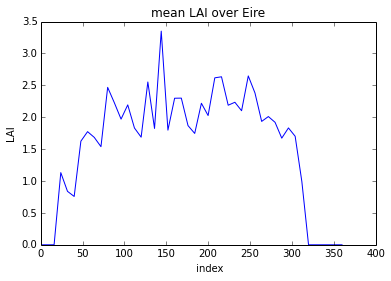

In [52]:
plt.plot(np.arange(lai.shape[0])*8,np.array(lai.mean(axis=1).mean(axis=1)))
plt.title('mean LAI over Eire')
plt.xlabel(' index')
plt.ylabel('LAI')